<a href="https://colab.research.google.com/github/SutapaNayak/Prediction-of-Attrition-rate/blob/main/Attrition_prediction_using_different_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Collect data


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving general_data.csv to general_data.csv


In [ ]:
df=pd.read_csv("general_data.csv")
print(df)

      Age Attrition  ... YearsSinceLastPromotion YearsWithCurrManager
0      51        No  ...                       0                    0
1      31       Yes  ...                       1                    4
2      32        No  ...                       0                    3
3      38        No  ...                       7                    5
4      32        No  ...                       0                    4
...   ...       ...  ...                     ...                  ...
4405   42        No  ...                       0                    2
4406   29        No  ...                       0                    2
4407   25        No  ...                       1                    2
4408   42        No  ...                       7                    8
4409   40        No  ...                       3                    9

[4410 rows x 24 columns]


In [ ]:
df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,1,Healthcare Representative,Married,131160,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,1,Research Scientist,Single,41890,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,4,Sales Executive,Married,193280,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,3,Human Resources,Married,83210,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,1,Sales Executive,Single,23420,4.0,Y,12,8,2,9.0,2,6,0,4


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   EmployeeCount            4410 non-null   int64  
 8   EmployeeID               4410 non-null   int64  
 9   Gender                   4410 non-null   object 
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome            4410 non-null   int64  
 14  NumCompaniesWorked      

## Analyze data

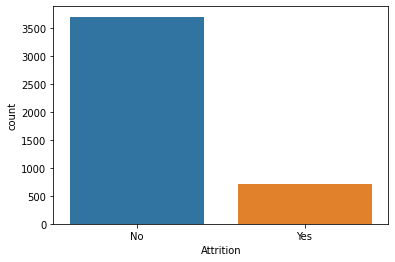

In [ ]:

sns.countplot(x="Attrition", data=df)

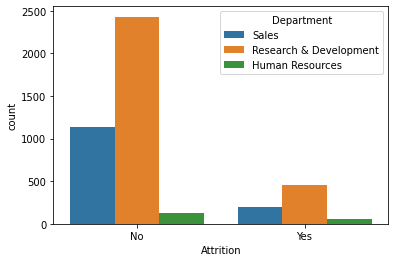

In [ ]:

sns.countplot(x="Attrition",hue="Department", data=df)

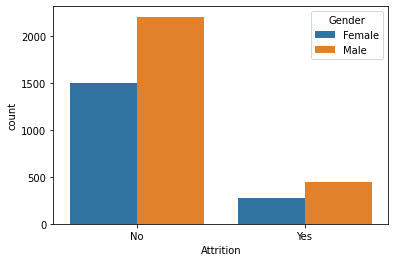

In [ ]:

sns.countplot(x="Attrition",hue="Gender", data=df)

In [ ]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeID                  0
Gender                      0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         19
Over18                      0
PercentSalaryHike           0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           9
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

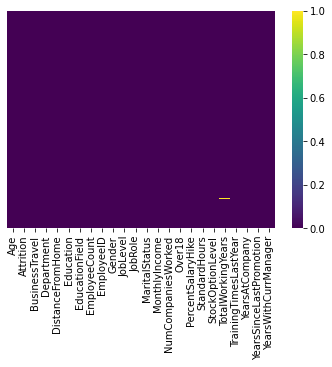

In [ ]:
sns.heatmap(df.isnull(),yticklabels=False,cmap='viridis')

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4382 entries, 0 to 4408
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4382 non-null   int64  
 1   Attrition                4382 non-null   object 
 2   BusinessTravel           4382 non-null   object 
 3   Department               4382 non-null   object 
 4   DistanceFromHome         4382 non-null   int64  
 5   Education                4382 non-null   int64  
 6   EducationField           4382 non-null   object 
 7   EmployeeCount            4382 non-null   int64  
 8   EmployeeID               4382 non-null   int64  
 9   Gender                   4382 non-null   object 
 10  JobLevel                 4382 non-null   int64  
 11  JobRole                  4382 non-null   object 
 12  MaritalStatus            4382 non-null   object 
 13  MonthlyIncome            4382 non-null   int64  
 14  NumCompaniesWorked      

## Data preprocessing

In [ ]:
def Attrition_new(x):
    if x== "Yes":
     return 1
    if x== "No":
     return 0

In [ ]:
df['Attrition_new']=df['Attrition'].apply(Attrition_new)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4382 entries, 0 to 4408
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4382 non-null   int64  
 1   Attrition                4382 non-null   object 
 2   BusinessTravel           4382 non-null   object 
 3   Department               4382 non-null   object 
 4   DistanceFromHome         4382 non-null   int64  
 5   Education                4382 non-null   int64  
 6   EducationField           4382 non-null   object 
 7   EmployeeCount            4382 non-null   int64  
 8   EmployeeID               4382 non-null   int64  
 9   Gender                   4382 non-null   object 
 10  JobLevel                 4382 non-null   int64  
 11  JobRole                  4382 non-null   object 
 12  MaritalStatus            4382 non-null   object 
 13  MonthlyIncome            4382 non-null   int64  
 14  NumCompaniesWorked      

In [ ]:
df.drop(["Attrition","BusinessTravel"], axis=1, inplace=True)

In [ ]:
df.drop(["Department","Over18","EducationField","Gender","JobRole","MaritalStatus"], axis=1, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4382 entries, 0 to 4408
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4382 non-null   int64  
 1   DistanceFromHome         4382 non-null   int64  
 2   Education                4382 non-null   int64  
 3   EmployeeCount            4382 non-null   int64  
 4   EmployeeID               4382 non-null   int64  
 5   JobLevel                 4382 non-null   int64  
 6   MonthlyIncome            4382 non-null   int64  
 7   NumCompaniesWorked       4382 non-null   float64
 8   PercentSalaryHike        4382 non-null   int64  
 9   StandardHours            4382 non-null   int64  
 10  StockOptionLevel         4382 non-null   int64  
 11  TotalWorkingYears        4382 non-null   float64
 12  TrainingTimesLastYear    4382 non-null   int64  
 13  YearsAtCompany           4382 non-null   int64  
 14  YearsSinceLastPromotion 

In [ ]:
x=df.drop('Attrition_new', axis=1)
y=df['Attrition_new']

## Train data

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=1,test_size=0.2)

##LogisticRegression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
lr=LogisticRegression()
lr.fit(x_train,y_train)
p1=lr.predict(x_test)
metrics.accuracy_score(y_test,p1)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8369441277080958

##KNeighborsClassifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
knnclassifier=KNeighborsClassifier(n_neighbors=5)
knnclassifier.fit(x_train,y_train)
y_pred=knnclassifier.predict(x_test)
metrics.accuracy_score(y_test,y_pred)

0.82212086659065

##RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
p3=rfc.predict(x_test)
metrics.accuracy_score(y_test,p3)

0.9863169897377423

##SVC

In [ ]:
from sklearn.svm import SVC
svm=SVC()
svm.fit(x_train,y_train)
p4=svm.predict(x_test)
metrics.accuracy_score(y_test,p4)

0.8369441277080958